# Reference

Class Handout, Lee, Chia Jung professor, MDM64001, School of Big Data Management, Soochow University

# Data

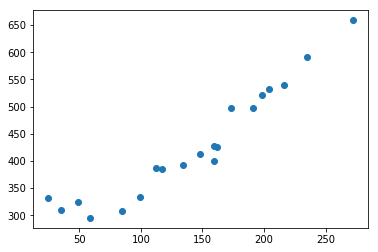

,X,y
X,1.000000,0.950392
y,0.950392,1.000000


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv(r'C:\Users\user\Desktop\git hub\finished\ml\regression\data\regression1.csv')
x = data.iloc[:, 0].values
y = data.iloc[:, 1].values

plt.plot(x, y, 'o')
plt.show()

data.corr()

# Normalization

* 在scikit-learn中，希望數據要儲存在二維陣列中，而X是一個一維陣列

In [2]:
from sklearn.preprocessing import StandardScaler


x = data.iloc[:,0].values.reshape(-1,1) 
y = data.iloc[:,-1]
sc_x = StandardScaler()
x_std = sc_x.fit_transform(x)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Linear Regression

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm


lr = LinearRegression()
lr.fit(x_std,y)
y_pred = lr.predict(x_std)
print('Slope: {:.3f}'.format(lr.coef_[0]))
print('Intercept:{:.3f}'.format(lr.intercept_))

Slope: 95.564
Intercept:428.600


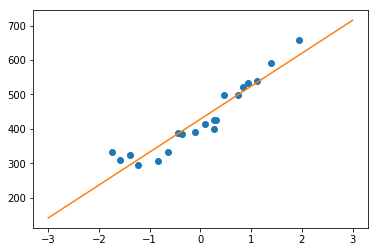

In [4]:
x = np.linspace(-3,3,100)
plt.plot(x_std, y, 'o')
plt.plot(x, lr.intercept_ + lr.coef_[0] * x)

In [5]:
print('MSE:{:.3f}'.format(sm.mean_squared_error(y, y_pred)))
print('R^2:{:.3f}'.format(sm.r2_score(y, y_pred)))

MSE:978.262
R^2:0.903


# Polynomial Regression

In [6]:
from sklearn.preprocessing import PolynomialFeatures


pr = LinearRegression()
quadradic = PolynomialFeatures(degree=2)
x_quad = quadradic.fit_transform(x_std)

In [7]:
pr.fit(x_quad,y)
y_quad_pred = pr.predict(x_quad)
print('theta1:{:.3f}'.format(pr.coef_[1]))
print('theta2:{:.3f}'.format(pr.coef_[2]))
print('Intercept:{:.3f}'.format(pr.intercept_))

theta1:97.133
theta2:22.623
Intercept:405.977


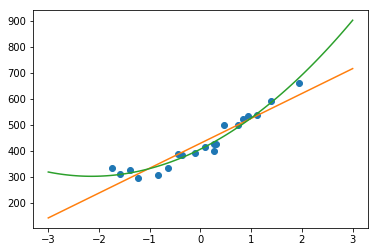

In [8]:
x = np.linspace(-3,3,100)
plt.plot(x_std, y, 'o')
plt.plot(x,lr.intercept_ + lr.coef_[0] * x)
plt.plot(x, pr.intercept_ + pr.coef_[1] * x + pr.coef_[2] * x ** 2)
plt.show()

# Correlation Matrix

In [9]:
from sklearn.datasets import load_diabetes
import pandas as pd


data = load_diabetes()
data.keys()
feature = pd.DataFrame(data['data'], columns = data['feature_names'])
target = pd.DataFrame(data['target'], columns = ['target'])
df = pd.concat([feature,target], axis=1)

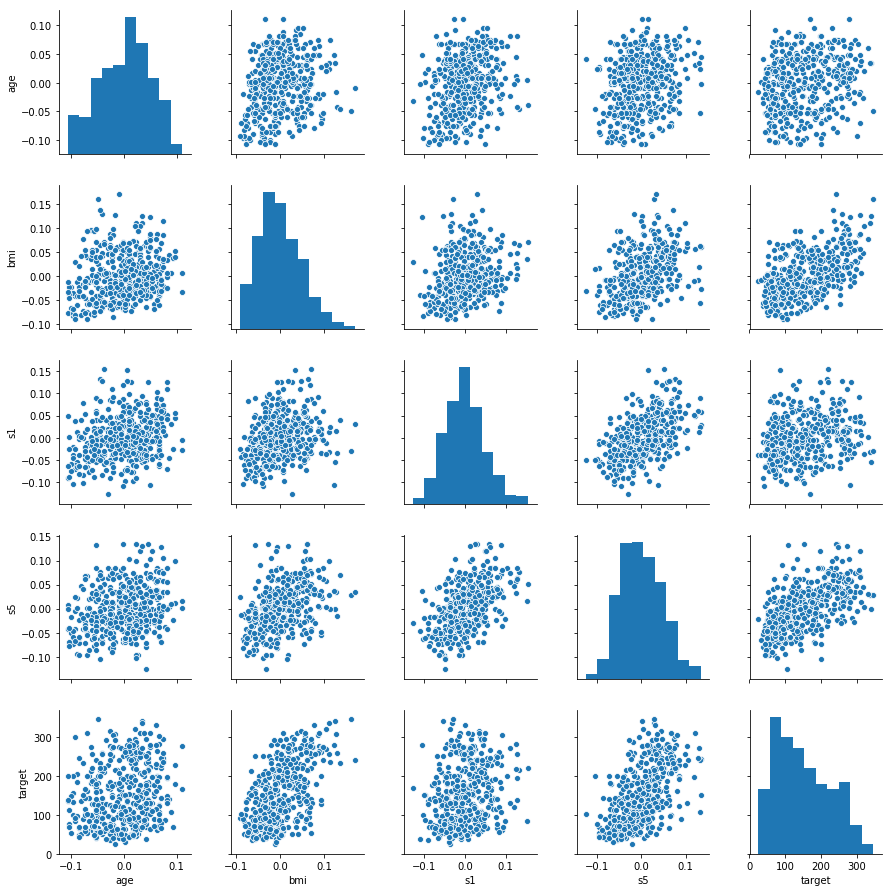

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


cols = ['age', 'bmi', 's1', 's5', 'target']
sns.pairplot(df[cols])
plt.tight_layout()
plt.savefig('scatterplot.png', dpi=300)
plt.show()

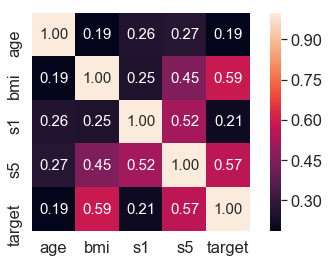

In [11]:
import numpy as np


plt.figure()
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
               cbar = True,
               annot = True,
               square = True,
               fmt = '.2f',
               annot_kws = {'size':15},
               yticklabels = cols,
               xticklabels = cols)
plt.tight_layout()
plt.savefig('correlation.png', dpi=300)
plt.show()

# Training and Testing Data Splitting

In [12]:
from sklearn.model_selection import train_test_split


x, y =data['data'], data['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 8)

In [13]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm


lr = LinearRegression()
lr.fit(x_train, y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
print('MSE_train:{:.3f}'.format(sm.mean_squared_error(y_train, y_train_pred)))
print('MSE_test:{:.3f}'.format(sm.mean_squared_error(y_test, y_test_pred)))
print('R^2_train:{:.3f}'.format(sm.r2_score(y_train, y_train_pred)))
print('R^2_test:{:.3f}'.format(sm.r2_score(y_test, y_test_pred)))

MSE_train:2812.369
MSE_test:3108.041
R^2_train:0.530
R^2_test:0.459


# Ridge Regression

In [16]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0).fit(x_train, y_train)
print(ridge.coef_)

[  36.8262072   -75.80823733  282.42652716  207.39314972   -1.46580263
  -27.81750835 -134.3740951    98.97724793  222.67543268  117.97255343]


In [17]:
y_train_pred = ridge.predict(x_train)
y_test_pred = ridge.predict(x_test)
print('MSE_train:{:.3f}'.format(sm.mean_squared_error(y_train, y_train_pred)))
print('MSE_test:{:.3f}'.format(sm.mean_squared_error(y_test, y_test_pred)))
print('R^2_train:{:.3f}'.format(sm.r2_score(y_train, y_train_pred)))
print('R^2_test:{:.3f}'.format(sm.r2_score(y_test, y_test_pred)))

MSE_train:3397.720
MSE_test:3262.233
R^2_train:0.433
R^2_test:0.433


# Lasso Regression

In [19]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=1.0).fit(x_train, y_train)
print(lasso.coef_)

[  0.          -0.         384.73421807  72.69325545   0.
   0.          -0.           0.         247.88881314   0.        ]


In [20]:
y_train_pred = lasso.predict(x_train)
y_test_pred = lasso.predict(x_test)
print('MSE_train:{:.3f}'.format(sm.mean_squared_error(y_train, y_train_pred)))
print('MSE_test:{:.3f}'.format(sm.mean_squared_error(y_test, y_test_pred)))
print('R^2_train:{:.3f}'.format(sm.r2_score(y_train, y_train_pred)))
print('R^2_test:{:.3f}'.format(sm.r2_score(y_test, y_test_pred)))

MSE_train:3818.201
MSE_test:3646.836
R^2_train:0.362
R^2_test:0.366
